# Algorithmic Bias

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.model_selection import train_test_split
bcDB = datasets.load_breast_cancer()

In [2]:
bcDF = pd.DataFrame(bcDB.data, columns= list(bcDB['feature_names']))
bcDF['target'] = pd.Series(bcDB.target)
bcDF = bcDF.sort_values(by = ['target'])
bcDF = bcDF.reset_index(drop=True)
bcDF.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,0.2384,0.07542,...,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460,0
2,12.34,26.86,81.15,477.4,0.1034,0.1353,0.1085,0.04562,0.1943,0.06937,...,39.34,101.7,768.9,0.1785,0.4706,0.4425,0.1459,0.3215,0.12050,0
3,14.86,23.21,100.40,671.4,0.1044,0.1980,0.1697,0.08878,0.1737,0.06672,...,27.78,118.6,784.7,0.1316,0.4648,0.4589,0.1727,0.3000,0.08701,0
4,13.77,22.29,90.63,588.9,0.1200,0.1267,0.1385,0.06526,0.1834,0.06877,...,34.01,111.6,806.9,0.1737,0.3122,0.3809,0.1673,0.3080,0.09333,0


In [3]:
vc = bcDF['target'].value_counts()
for i,j in enumerate(bcDB.target_names):
    print (vc[i],j)

212 malignant
357 benign


In [4]:
y = bcDF.pop('target').values
X = bcDF.values
X.shape, y.shape

((569, 30), (569,))

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
print(X_train.shape,X_test.shape)

(426, 30) (143, 30)


### Method for creating Confusion Matrix and Printing False Positive(FP) Rate

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fp_rate = cm[0,1]/(cm[0,1]+cm[0,0])
    print('FP Rate is:', fp_rate)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="black" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


## Hold-Out Method

### In Hold-out stratergy we keep some training data back (the hold-out set) to use for evaluating the model produced by the classifier.

### kNN

Malignant in test set : 0.40
Predicted malignant : 0.36
Accuracy Score:  0.916083916083916
Normalized confusion matrix
[[0.84 0.16]
 [0.03 0.97]]
FP Rate is: 0.15789473684210525


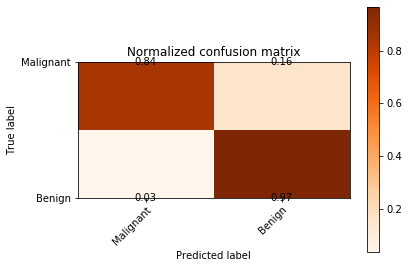

In [7]:
#Hold Out
kNN = KNeighborsClassifier(n_neighbors=3)
y_pred = kNN.fit(X_train, y_train).predict(X_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))
print ("Accuracy Score: ", accuracy_score(y_test,y_pred))
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')

### Decision Tree

Malignant in test set : 0.40
Predicted malignant : 0.41
Accuracy Score:  0.9230769230769231
Normalized confusion matrix
[[0.91 0.09]
 [0.07 0.93]]
FP Rate is: 0.08771929824561403


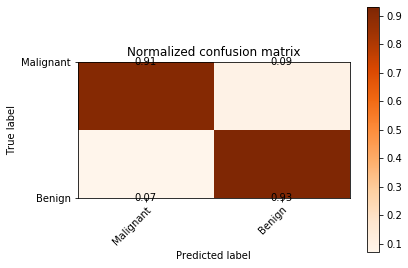

In [8]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy')
dt_tree = DT.fit(X_train,y_train)
y_pred = dt_tree.predict(X_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))
print ("Accuracy Score: ", accuracy_score(y_test,y_pred))
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')

### Naive Bayes

Malignant in test set : 0.39
Predicted malignant : 0.41
Accuracy Score:  0.9300699300699301
Normalized confusion matrix
[[0.93 0.07]
 [0.07 0.93]]
FP Rate is: 0.07142857142857142


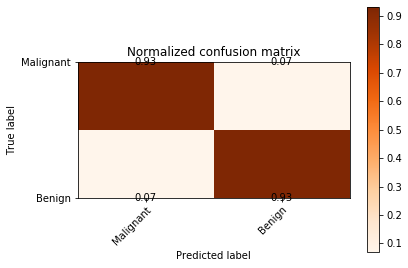

In [9]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
bc_NB = gnb.fit(X_train,y_train)
y_test= bc_NB.predict(X_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))
print ("Accuracy Score: ", accuracy_score(y_test,y_pred))

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')

### Logistic Regression

Malignant in test set : 0.39
Predicted malignant : 0.37
Accuracy Score:  0.8811188811188811
Normalized confusion matrix
[[0.82 0.18]
 [0.08 0.92]]
FP Rate is: 0.17857142857142858


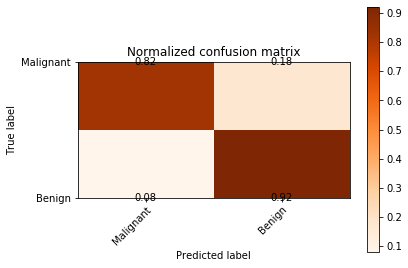

In [10]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
y_pred=logReg.fit(X_train,y_train).predict(X_test)
y_test.sum()/len(y_test)
print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))
print ("Accuracy Score: ", accuracy_score(y_test,y_pred))

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')

## Cross Validation Method

### Cross-validation or ‘k-fold cross-validation’ is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

### kNN

In [11]:
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt

10x CV Accuracy kNNs: 0.94
Malignant in test set : 0.37
Predicted malignant : 0.35
Normalized confusion matrix
[[0.86 0.14]
 [0.04 0.96]]
FP Rate is: 0.14150943396226415


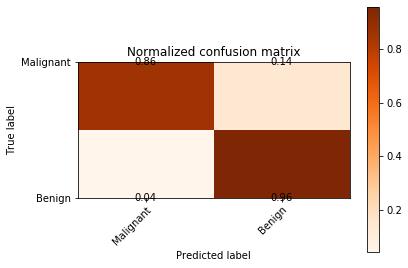

In [12]:
kNN_scores = cross_val_score(kNN, X, y, cv=10, scoring='f1')
print("10x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean())) 
y_pred = cross_val_predict(kNN, X, y, cv=10)
print("Malignant in test set : %0.2f" % (1- (y.sum()/len(y))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

# Plot normalized confusion matrix
plot_confusion_matrix(y, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')
fpr_knn, tpr_knn, t_knn = roc_curve(y, y_pred)
roc_auc_knn = auc(fpr_knn, tpr_knn)

### Decision Tree

10x CV Accuracy Trees: 0.94
Malignant in test set : 0.37
Predicted malignant : 0.38
Normalized confusion matrix
[[0.89 0.11]
 [0.08 0.92]]
FP Rate is: 0.10849056603773585


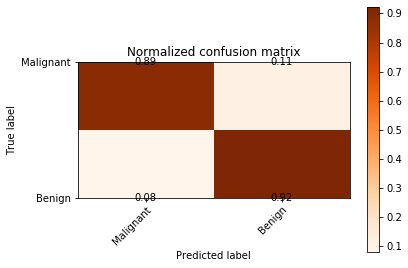

In [13]:
tree_scores = cross_val_score(DT, X, y, cv=10, scoring='f1')
print("10x CV Accuracy Trees: {0:.2f}".format(tree_scores.mean())) 
y_pred = cross_val_predict(DT, X, y, cv=10)
print("Malignant in test set : %0.2f" % (1- (y.sum()/len(y))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

# Plot normalized confusion matrix
plot_confusion_matrix(y, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')
fpr_dt, tpr_dt, t_dt = roc_curve(y, y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

### Naive Bayes

10x CV Accuracy Naive: 0.95
Malignant in test set : 0.37
Predicted malignant : 0.35
Normalized confusion matrix
[[0.89 0.11]
 [0.03 0.97]]
FP Rate is: 0.10849056603773585


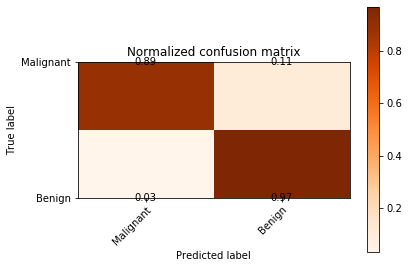

In [14]:
gnb_scores = cross_val_score(gnb, X, y, cv=10,scoring='f1')
print("10x CV Accuracy Naive: {0:.2f}".format(gnb_scores.mean())) 
y_pred = cross_val_predict(gnb, X, y, cv=10)

print("Malignant in test set : %0.2f" % (1- (y.sum()/len(y))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

# Plot normalized confusion matrix
plot_confusion_matrix(y, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')
#y_pred = gnb.fit(X_train, y_train).predict_proba(y.rehsape(1,-1))
fpr_gnb, tpr_gnb, t_gnb = roc_curve(y, y_pred)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

### Logistic Regression

10x CV Accuracy Logistic Regression: 0.96
Malignant in test set : 0.37
Predicted malignant : 0.36
Normalized confusion matrix
[[0.92 0.08]
 [0.03 0.97]]
FP Rate is: 0.08490566037735849


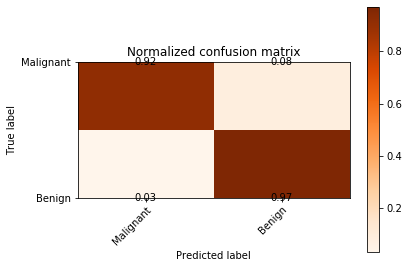

In [15]:
logReg_scores = cross_val_score(logReg, X, y, cv=10,scoring='f1')
print("10x CV Accuracy Logistic Regression: {0:.2f}".format(logReg_scores.mean())) 
y_pred = cross_val_predict(logReg, X, y, cv=10)

print("Malignant in test set : %0.2f" % (1- (y.sum()/len(y))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

# Plot normalized confusion matrix
plot_confusion_matrix(y, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')
fpr_lr, tpr_lr, t_lr = roc_curve(y, y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# FP & TP Rate Calculation

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

print(tp)
models = [kNN,DT,gnb,logReg]

folds = 4
v = 0 #  use 1 or 0

for m in models:
    cv_results = cross_validate(m, X, y, cv= folds,scoring=scoring, return_train_score=False, 
                                    verbose = v, n_jobs = -1)
    fp_rate = cv_results['test_fp'].sum()/(cv_results['test_fp'].sum()+cv_results['test_tn'].sum())
    tp_rate = cv_results['test_tp'].sum()/(cv_results['test_tp'].sum()+cv_results['test_fn'].sum())
  
    print("{} x CV {:22} FP: {:.2f}  TP: {:.2f}".format(folds, type(m).__name__, fp_rate, tp_rate)) 


<function tp at 0x000001DC95EB7048>
4 x CV KNeighborsClassifier   FP: 0.13  TP: 0.96
4 x CV DecisionTreeClassifier FP: 0.10  TP: 0.94
4 x CV GaussianNB             FP: 0.11  TP: 0.97
4 x CV LogisticRegression     FP: 0.08  TP: 0.97


## Conclusion
### Looking at the results of both the methods for all  algorithms, it can be seen that cross validation performs better with high accuracy rates. However, it can be seen that malignant is a minority class but still our predicted values are less then the actual test values showing that these algorithms are biased over majority class. 

### Also over all the algorithms FP rate for kNN is highest. Hence kNN is the most biased among these

# RoC curve ploting

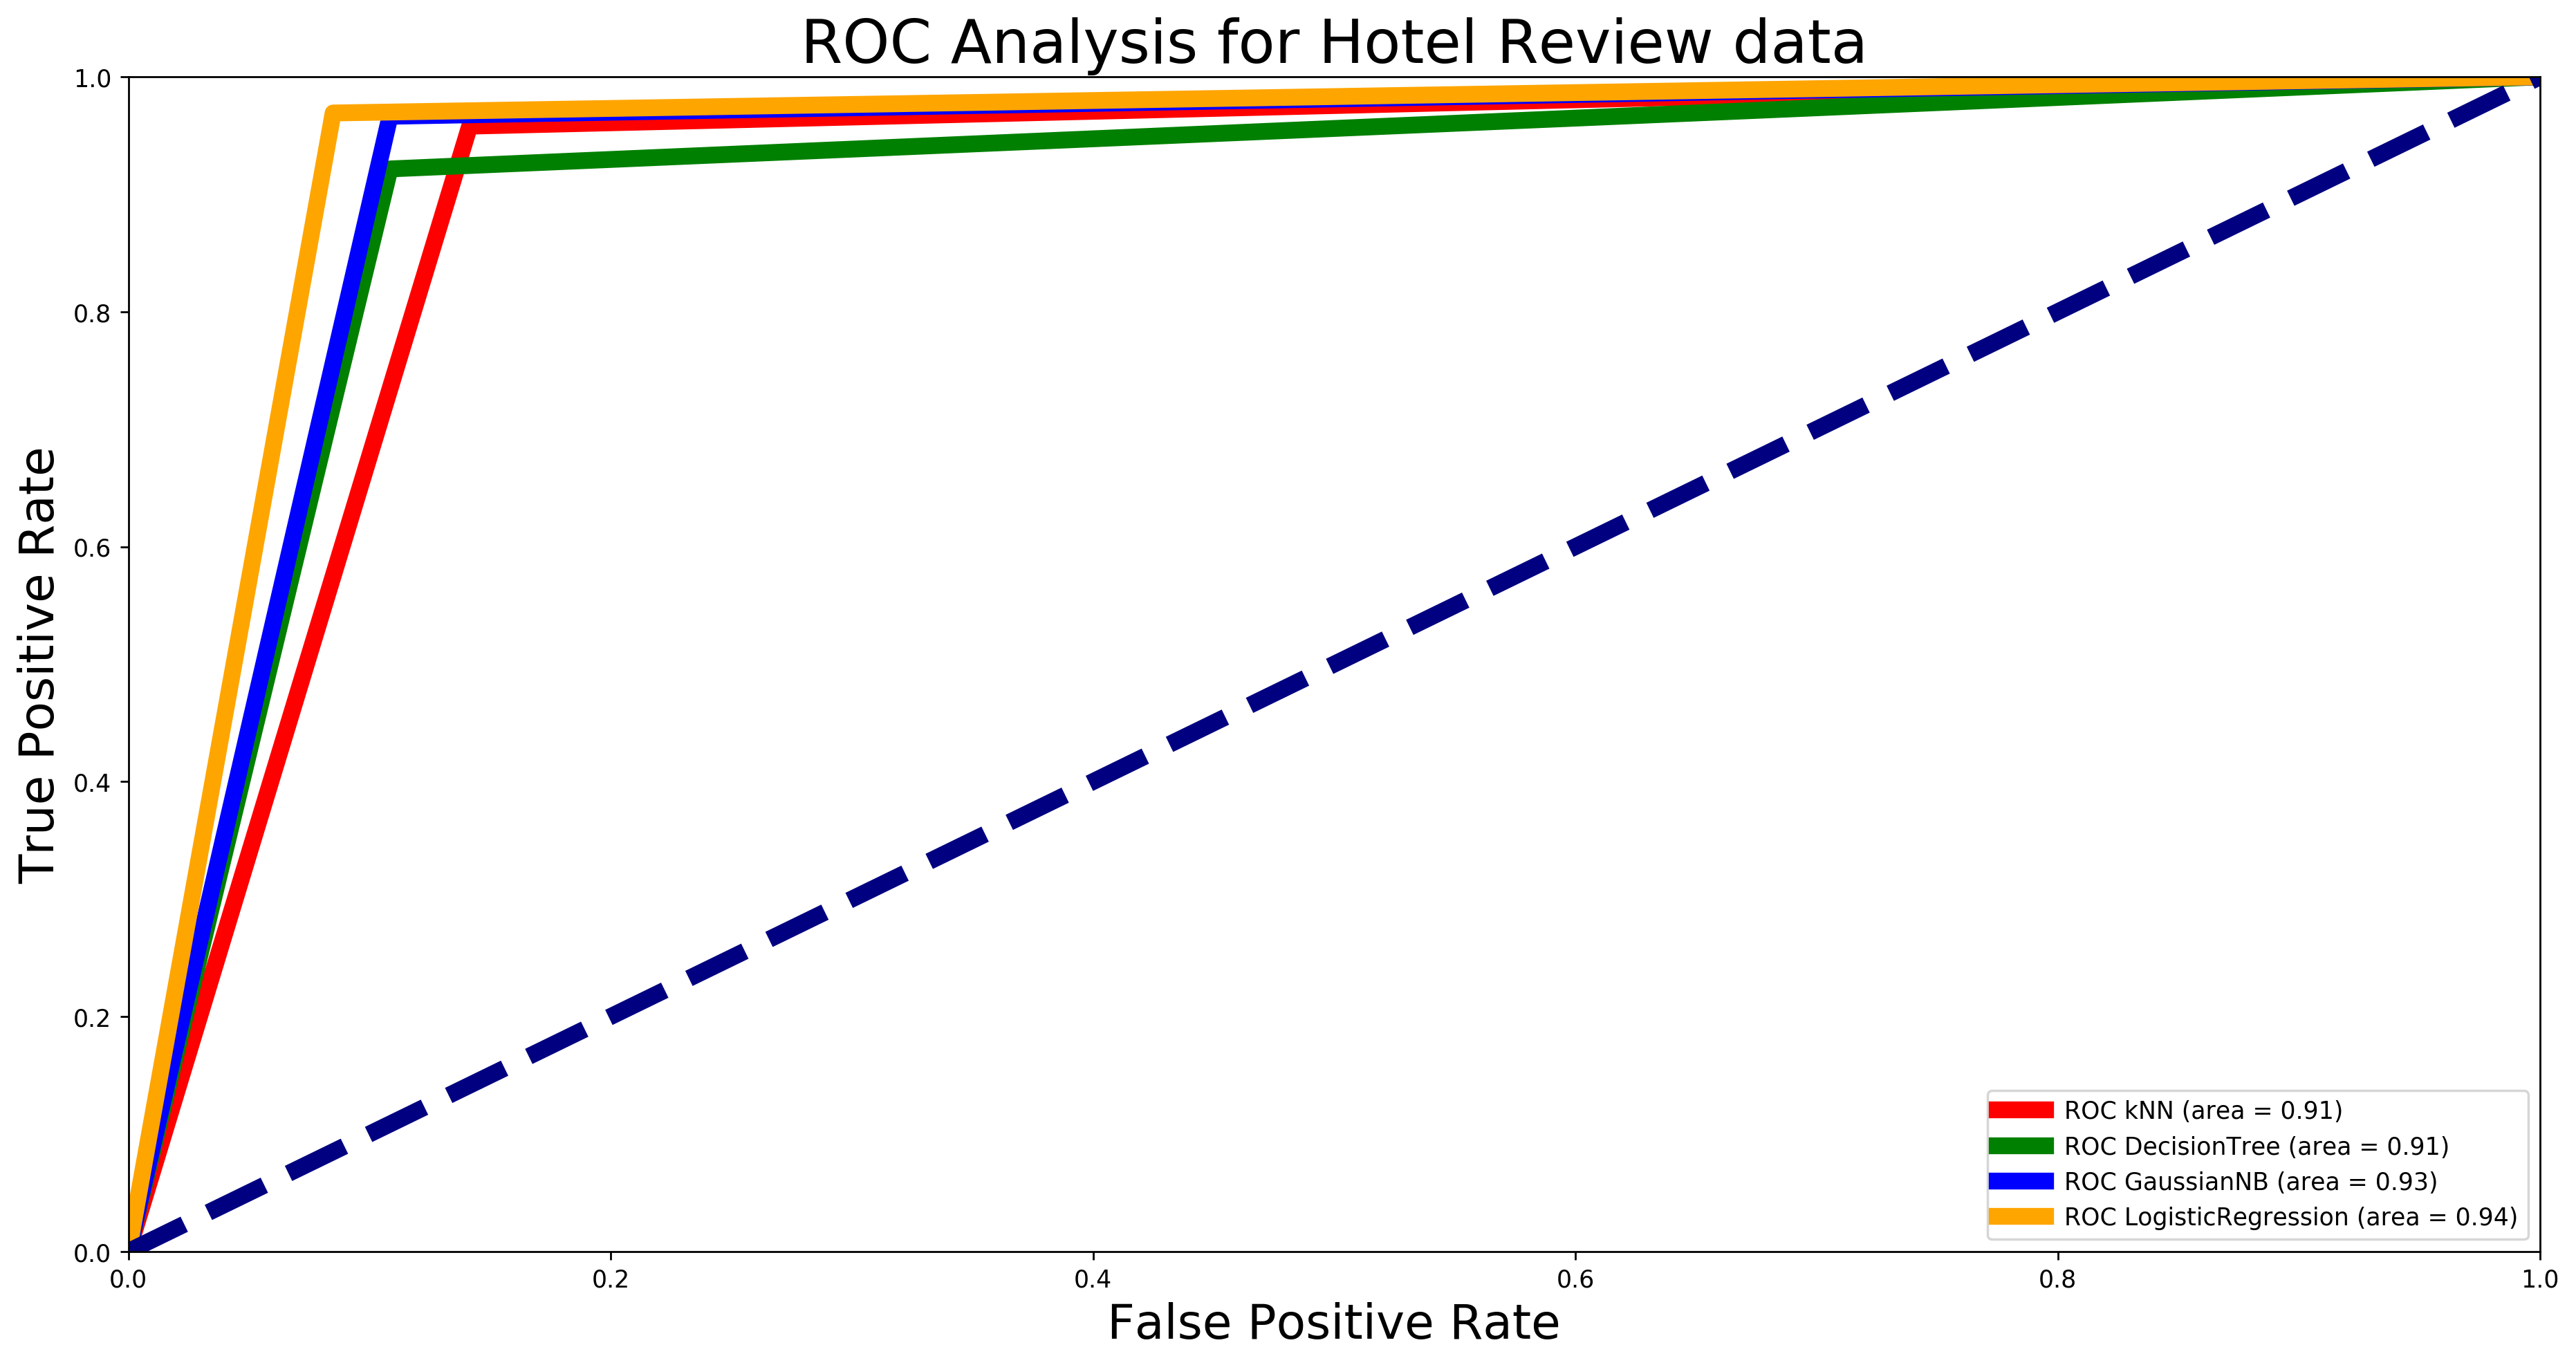

In [17]:
%matplotlib inline
plt.figure(figsize = (18,9), dpi=250)
lw = 7
plt.plot(fpr_knn, tpr_knn, color='red',
         lw=lw, label='ROC kNN (area = %0.2f)' % roc_auc_knn)

plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='ROC DecisionTree (area = %0.2f)' % roc_auc_dt)

plt.plot(fpr_gnb, tpr_gnb, color='blue',
         lw=lw, label='ROC GaussianNB (area = %0.2f)' % roc_auc_gnb)

plt.plot(fpr_lr, tpr_lr, color='orange',
         lw=lw, label='ROC LogisticRegression (area = %0.2f)' % roc_auc_lr)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Analysis for Hotel Review data', fontsize=25)
plt.legend(loc="lower right")
plt.show()

# Oversampling stratergy for Imbalance Dataset

### Class Imbalance Dataset: When the distribution of classes present in a data is not uniform such that the number of instances of a class significantly out numbers the instances of another class leads to class imbalance

### To recifying the bias there are several methods available, but I have used Random Oversampling.

In [18]:
from imblearn.over_sampling import RandomOverSampler
ran_ovr_samp = RandomOverSampler(random_state = 0)
X_newsample, y_newsample = ran_ovr_samp.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_newsample, y_newsample, random_state = 2 , stratify = y_newsample)

### kNN

Malignant in test set : 0.50
Predicted malignant : 0.49
Normalized confusion matrix
[[0.91 0.09]
 [0.06 0.94]]
FP Rate is: 0.08888888888888889


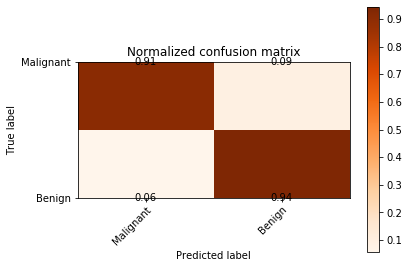

In [19]:
y_pred = kNN.fit(X_train, y_train).predict(X_test)
#print(X_train.shape,X_test.shape)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

plot_confusion_matrix(y_test, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')

### Decision Trees

Malignant in test set : 0.50
Predicted malignant : 0.52
Normalized confusion matrix
[[0.97 0.03]
 [0.07 0.93]]
FP Rate is: 0.03333333333333333


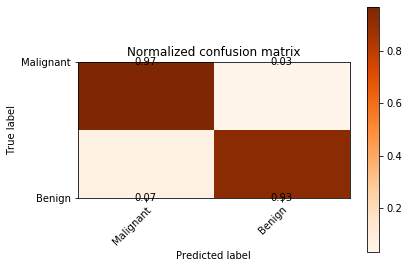

In [20]:
y_pred = DT.fit(X_train, y_train).predict(X_test)
#print(X_train.shape,X_test.shape)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

plot_confusion_matrix(y_test, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')

### Gaussian Naive Bayes

Malignant in test set : 0.50
Predicted malignant : 0.47
Normalized confusion matrix
[[0.92 0.08]
 [0.01 0.99]]
FP Rate is: 0.07777777777777778


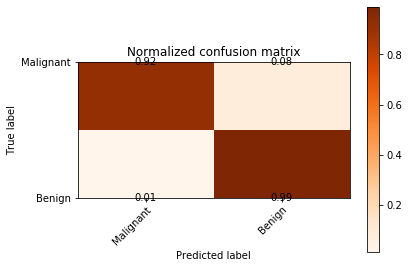

In [21]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)
#print(X_train.shape,X_test.shape)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

plot_confusion_matrix(y_test, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')

### Logarithmic Regression

Malignant in test set : 0.50
Predicted malignant : 0.50
Normalized confusion matrix
[[0.98 0.02]
 [0.02 0.98]]
FP Rate is: 0.022222222222222223


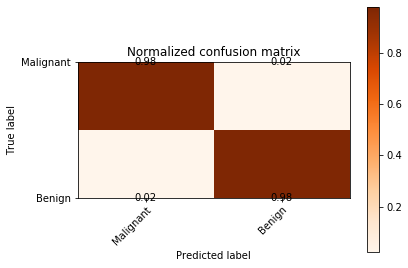

In [22]:
y_pred = logReg.fit(X_train, y_train).predict(X_test)
#print(X_train.shape,X_test.shape)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

plot_confusion_matrix(y_test, y_pred, classes=['Malignant','Benign'], normalize=True,
                      title='Normalized confusion matrix')

### FP rates of each Algorithms:
##### kNN : 0.0888
##### Decision Tree: 0.0333
##### Gaussian Naive Bayes: 0.0777
##### Logarithmic Regression: 0.0222

#### Random Oversampling: This method works with minority class. It replicates the observations from minority class to balance the data. It randomly oversampling the minority class. An advantage of using this method is that it leads to no information loss
#### After applying random oversampling  the FP rates significantly decreases for each algorithm implying that algorithms are now less biased.The disadvantage of using this method is that, since oversampling simply adds replicated observations in original data set, it ends up adding multiple observations of several types, thus leading to overfitting. Although, the training accuracy of such data set will be high, but the accuracy on unseen data will be worse.

#### Based on the results the FP rate of Logarithmic Regression least hence performing best in my case.

# Task3.

## Classification Algorithm on Cryotherapy Dataset

#### Crytherapy Dataset: This dataset is used to classify whether the person was treated successfully or not based on six features age,sex,time,Number_of_Warts,type and area. 

In [23]:
import pandas as pd
path = r"D:\Study\ML_Python\Assignment\divorce\Cryotherapy.xlsx"
cryo_df= pd.read_excel(path)
cryo_df.shape

(236, 7)

In [24]:
cryo_yes = cryo_df['Result_of_Treatment'].sum()
cryo_no  = len(cryo_df['Result_of_Treatment']) - cryo_df['Result_of_Treatment'].sum()
print ('Result Yes: ', cryo_yes)
print ('Result No: ',cryo_no)

Result Yes:  85
Result No:  151


In [25]:
y = cryo_df.pop('Result_of_Treatment').values
X = cryo_df.values
X.shape, y.shape

((236, 6), (236,))

### I have applied both hold-out and Oversampling method on this dataset to which works better because the dataset is imbalance as it has more number of patients that are not treated correctly vs patients that were treated correctly.

## Holdout method

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### kNN

Disease treated successfully in test set : 0.63
Predicted treated disease : 0.66
Accuracy Score:  0.559322033898305
Confusion matrix, without normalization
[[25 12]
 [14  8]]
FP Rate is: 0.32432432432432434


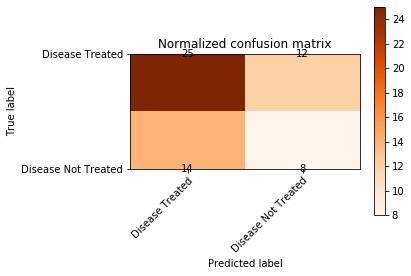

In [27]:
kNN = KNeighborsClassifier(n_neighbors=3)
y_pred = kNN.fit(X_train, y_train).predict(X_test)
print("Disease treated successfully in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted treated disease : %0.2f" % (1- (y_pred.sum()/len(y_pred))))
print ("Accuracy Score: ", accuracy_score(y_test,y_pred))
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Disease Treated','Disease Not Treated'], normalize=False,
                      title='Normalized confusion matrix')

### Decision Tree

Disease treated successfully in test set : 0.63
Predicted treated disease : 0.63
Accuracy Score:  0.5932203389830508
Confusion matrix, without normalization
[[25 12]
 [12 10]]
FP Rate is: 0.32432432432432434


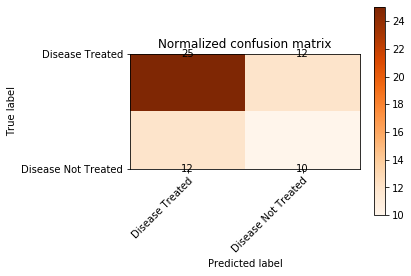

In [28]:
DT = DecisionTreeClassifier(criterion='entropy')
y_pred = DT.fit(X_train, y_train).predict(X_test)
print("Disease treated successfully in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted treated disease : %0.2f" % (1- (y_pred.sum()/len(y_pred))))
print ("Accuracy Score: ", accuracy_score(y_test,y_pred))
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Disease Treated','Disease Not Treated'], normalize=False,
                      title='Normalized confusion matrix')

### Gaussian Naive Bayes

Disease treated successfully in test set : 0.63
Predicted treated disease : 0.47
Accuracy Score:  0.5423728813559322
Confusion matrix, without normalization
[[19 18]
 [ 9 13]]
FP Rate is: 0.4864864864864865


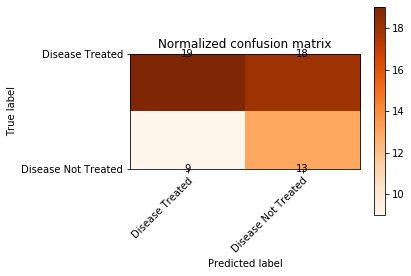

In [29]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Disease treated successfully in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted treated disease : %0.2f" % (1- (y_pred.sum()/len(y_pred))))
print ("Accuracy Score: ", accuracy_score(y_test,y_pred))
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Disease Treated','Disease Not Treated'], normalize=False,
                      title='Normalized confusion matrix')

### Logistic Regression

Disease treated successfully in test set : 0.63
Predicted treated disease : 0.78
Confusion matrix, without normalization
[[29  8]
 [17  5]]
FP Rate is: 0.21621621621621623


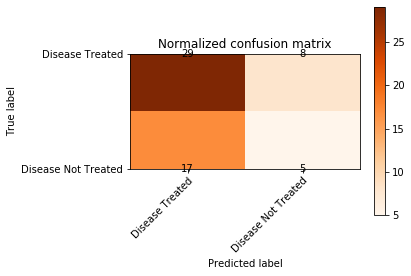

In [30]:
logReg=LogisticRegression()
y_pred = logReg.fit(X_train, y_train).predict(X_test)

print("Disease treated successfully in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted treated disease : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Disease Treated','Disease Not Treated'], normalize=False,
                      title='Normalized confusion matrix')

## OverSampling

### kNN

In [31]:
from imblearn.over_sampling import RandomOverSampler

Disease treated successfully in test set : 0.50
Predicted treated disease : 0.53
Confusion matrix, without normalization
[[27 11]
 [13 25]]
FP Rate is: 0.2894736842105263


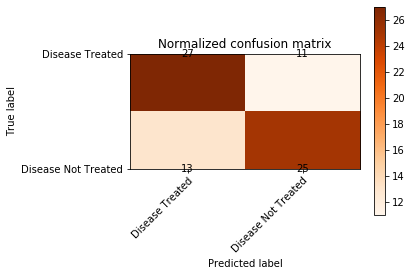

In [32]:
ran_ovr_samp = RandomOverSampler(random_state = 4)
X_newsample, y_newsample = ran_ovr_samp.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_newsample, y_newsample, random_state=2)
y_pred = kNN.fit(X_train, y_train).predict(X_test)
#print(X_train.shape,X_test.shape)

print("Disease treated successfully in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted treated disease : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

plot_confusion_matrix(y_test, y_pred, classes=['Disease Treated','Disease Not Treated'], normalize=False,
                      title='Normalized confusion matrix')

### Decision Tree

Disease treated successfully in test set : 0.54
Predicted treated disease : 0.61
Confusion matrix, without normalization
[[31 10]
 [15 20]]
FP Rate is: 0.24390243902439024


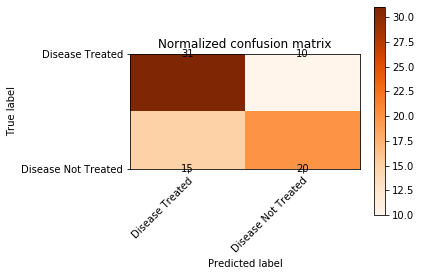

In [33]:
ran_ovr_samp = RandomOverSampler(random_state = 4)
X_newsample, y_newsample = ran_ovr_samp.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_newsample, y_newsample, random_state=1)
y_pred = DT.fit(X_train, y_train).predict(X_test)
#print(X_train.shape,X_test.shape)

print("Disease treated successfully in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted treated disease : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

plot_confusion_matrix(y_test, y_pred, classes=['Disease Treated','Disease Not Treated'], normalize=False,
                      title='Normalized confusion matrix')

### Gaussian Naive Bayes

Malignant in test set : 0.50
Predicted malignant : 0.43
Confusion matrix, without normalization
[[24 14]
 [ 9 29]]
FP Rate is: 0.3684210526315789


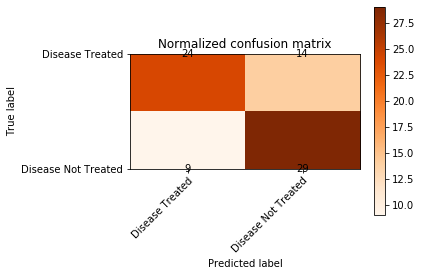

In [34]:
ran_ovr_samp = RandomOverSampler(random_state = 2)
X_newsample, y_newsample = ran_ovr_samp.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_newsample, y_newsample, random_state=9)
y_pred = gnb.fit(X_train, y_train).predict(X_test)
#print(X_train.shape,X_test.shape)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

plot_confusion_matrix(y_test, y_pred, classes=['Disease Treated','Disease Not Treated'], normalize=False,
                      title='Normalized confusion matrix')

### Logistic Regression

Disease treated successfully in test set : 0.55
Predicted treated disease : 0.62
Confusion matrix, without normalization
[[35  7]
 [12 22]]
FP Rate is: 0.16666666666666666


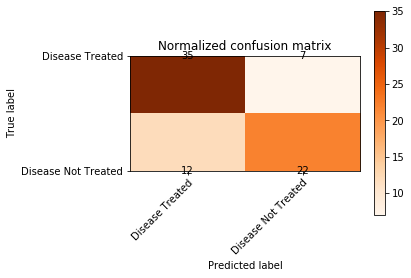

In [35]:
ran_ovr_samp = RandomOverSampler(random_state = 3)
X_newsample, y_newsample = ran_ovr_samp.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_newsample, y_newsample, random_state=0)
logReg=LogisticRegression()
y_pred = logReg.fit(X_train, y_train).predict(X_test)

print("Disease treated successfully in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted treated disease : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Disease Treated','Disease Not Treated'], normalize=False,
                      title='Normalized confusion matrix')

### FP-Rate for each algorithms

#### kNN,Decison Tree,Gaussian naive Bayes,Logistic Regression
#### 0.3243,0.324,0.486,0.21 : Hand-Out	
#### 0.28,024,0.36,0.16: Oversampling

	


#### Conclusion

#### As the dataset was imbalanced the intial hand-out algorithms were biased. After applying oversampling it can be seen above that the FP rate decreases for each classification alorithm.  